# Notes on Plotting

The workbook ``Plotting with Python`` introduced the basics of plotting in Python. This notebook will discuss some general guidelines for plotting. That is, ways to more optimally present the data.

In [ ]:
# Install cmocean
!sudo pip3 install cmocean

In [1]:
# First, we import the package
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import cmocean

## 1D Plotting

In general, not much needs to be done with 1D (line) plots. Some things to consider when creating a plot:
- The x- and y-axis can be changed to a log scale using ``plt.xscale('log')`` and ``plt.yscale('log')``. For an axes object, ``ax.set_xscale('log')`` has the same effect.
- The x- and y-axis can be automatically tightened using ``plt.axis('tight')``, removing any unnecessary white space.

## 2D Plotting

Since 2D plotting typically involves using a colour bar and having the reader visually map colours to values, it can be important to ensure that the data is being presented in the best way.

Before choosing a colour map, you first need to classify your data as **divergent** or **non-divergent**. By the former, we mean a data set in which the deviations *in both directions* from a canonical reference point are of interest. For example, a velocity field has a canonical value of 0 (assuming no background flow), and so this data could be considered **diverging away from 0**. In contrast, a plot of kinetic energy has no value about which it diverges.

This question can also be formulated as: is the data **2-sided** or **1-sided**. A velocity field would be 2-sided (positive and negative), while kinetic energy would be 1-sided (positive). Similarly, a *difference* between two fields will likely be **2-sided**, and so a divergent field.



### Divergent (2-sided) Data

In the following example, we will plot the difference between two fields, ``Z1`` and `Z2`. 

In the left-most plot, a non-divergent colour map is used. While not necessarily a poor representation of the data, it is unclear where `0` occurs in the graph (and so when `Z1=Z2`), and so the plot is sub-optimal.

In the centre plot, a divergent colour map is used. In this case we can clearly see where the difference vanishes (white regions), and where Z1 is greater than Z2 (red regions).

In the right-most plot, a divergent colour map is used, but the colour bar has been changed so that `0` is not the centre of the colour axis. This demonstrates an important property of divergent colour maps: ** when plotting divergent data with divergent colour maps, it is *very important* that the colour axis be centred about the divergence point**

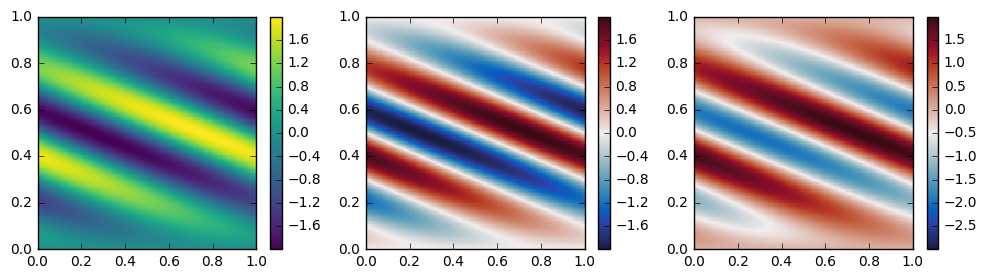

In [6]:
x = np.linspace(0,1,200)
y = np.linspace(0,1,200)
X,Y = np.meshgrid(x,y)

Z1 = np.sin(2*np.pi*(X + 3*Y))
Z2 = np.sin(2*np.pi*(X + 2*Y))

plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.pcolormesh(X,Y,Z1-Z2, cmap='viridis')
plt.colorbar()

plt.subplot(1,3,2)
cv = np.max(np.abs(Z1-Z2))
plt.pcolormesh(X,Y,Z1-Z2, cmap=cmocean.cm.balance, vmin=-cv, vmax=cv)
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolormesh(X,Y,Z1-Z2, cmap=cmocean.cm.balance, vmin=-1.5*cv, vmax=cv)
plt.colorbar()

### Non-divergent (1-sided) Data

In the following example we consider a field that is the sum of two Gaussian bumps. Since our data is only 1-sided, we will use a non-divergent colour map.

On the left-most plot, a non-divergent and perceptually uniform colour map is used, which provides a visually consistent representation for each value.

On the centre plot, a non-divergent colour map is used, but the choice is *not* perceptually uniform. In this case, the choice of colourmap has artificially highlighted some portions of the hill.

In the right-most plot, a divergent colour map is used. The divergent colour map emphasizes the centre point, which isn't naturally emphasized by the data.

In this case, we notice that using a divergent colour map for a non-divergent field can produce misleading results. Likewise, using a poor non-divergent map can also misrepresent the data. Matplotlib has four perceptually uniform colour maps: `viridis`, `plasma`, `inferno`, and `magma`.

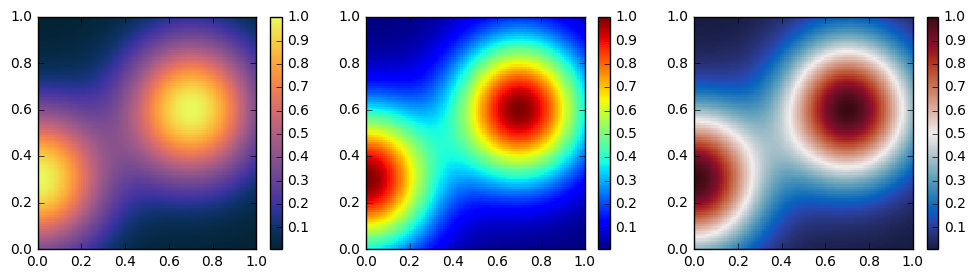

In [10]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X,Y = np.meshgrid(x,y)

Z = np.exp(-((X/0.3)**2 + ((Y-0.3)/0.3)**2)) + np.exp(-(((X-0.7)/0.3)**2 + ((Y-0.6)/0.3)**2))

plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.pcolormesh(X,Y,Z, cmap=cmocean.cm.thermal)
plt.colorbar()

plt.subplot(1,3,2)
plt.pcolormesh(X,Y,Z, cmap='jet')
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolormesh(X,Y,Z, cmap=cmocean.cm.balance)
plt.colorbar()

## Phase Data

Using the circular colourmap provided by cmocean, we can easily plot phase using a periodic and perceptuall uniform colour map.

[]

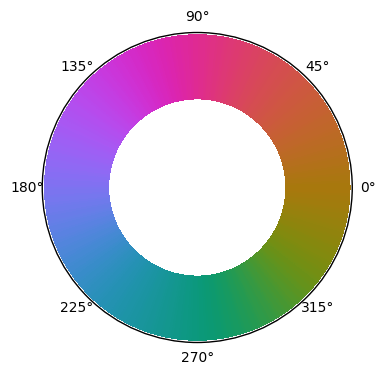

In [4]:
azimuths = np.arange(0, 361, 1)
zeniths = np.arange(40, 70, 1)
values = azimuths * np.ones((30, 361))
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.pcolormesh(azimuths*np.pi/180.0, zeniths, values, cmap=cmocean.cm.phase)
ax.set_yticks([])